# Energy Prediction Model for House Energy Consumption Optimization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [96]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [97]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [98]:
df.shape

(19735, 29)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [100]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [101]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [3]:
cols = []
for col in df.columns:
    if col!= 'date':
        cols.append(col)

In [4]:
df = df[cols].round(2)
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,...,17.03,45.53,6.60,733.5,92.00,7.00,63.00,5.30,13.28,13.28
1,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,...,17.07,45.56,6.48,733.6,92.00,6.67,59.17,5.20,18.61,18.61
2,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,...,17.00,45.50,6.37,733.7,92.00,6.33,55.33,5.10,28.64,28.64
3,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,...,17.00,45.40,6.25,733.8,92.00,6.00,51.50,5.00,45.41,45.41
4,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,...,17.00,45.40,6.13,733.9,92.00,5.67,47.67,4.90,10.08,10.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
19731,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
19732,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20
19733,420,10,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,...,23.20,46.82,22.33,755.2,56.67,3.83,26.17,13.23,6.32,6.32


In [104]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686562,40.259721,20.341193,40.420409,22.267591,39.242463,20.855335,39.026890,...,19.485813,41.552393,7.411665,755.522599,79.750418,4.039752,38.330834,3.760705,24.988046,24.988046
std,102.524891,7.935988,1.606068,3.979259,2.192998,4.069791,2.006122,3.254567,2.042882,4.341312,...,2.014712,4.151500,5.317409,7.399441,14.901086,2.451203,11.794729,4.194649,14.496655,14.496655
min,10.000000,0.000000,16.790000,27.020000,16.100000,20.460000,17.200000,28.770000,15.100000,27.660000,...,14.890000,29.170000,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.010000,0.010000
25%,50.000000,0.000000,20.760000,37.330000,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.930000,70.330000,2.000000,29.000000,0.900000,12.500000,12.500000
50%,60.000000,0.000000,21.600000,39.660000,20.000000,40.500000,22.100000,38.530000,20.670000,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.670000,3.670000,40.000000,3.430000,24.900000,24.900000
75%,100.000000,0.000000,22.600000,43.070000,21.500000,43.260000,23.290000,41.760000,22.100000,42.160000,...,20.600000,44.335000,10.410000,760.930000,91.670000,5.500000,40.000000,6.570000,37.585000,37.585000
max,1080.000000,70.000000,26.260000,63.360000,29.860000,56.030000,29.240000,50.160000,26.200000,51.090000,...,24.500000,53.330000,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,50.000000,50.000000


In [105]:
df.dtypes

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [106]:
# Data exploration

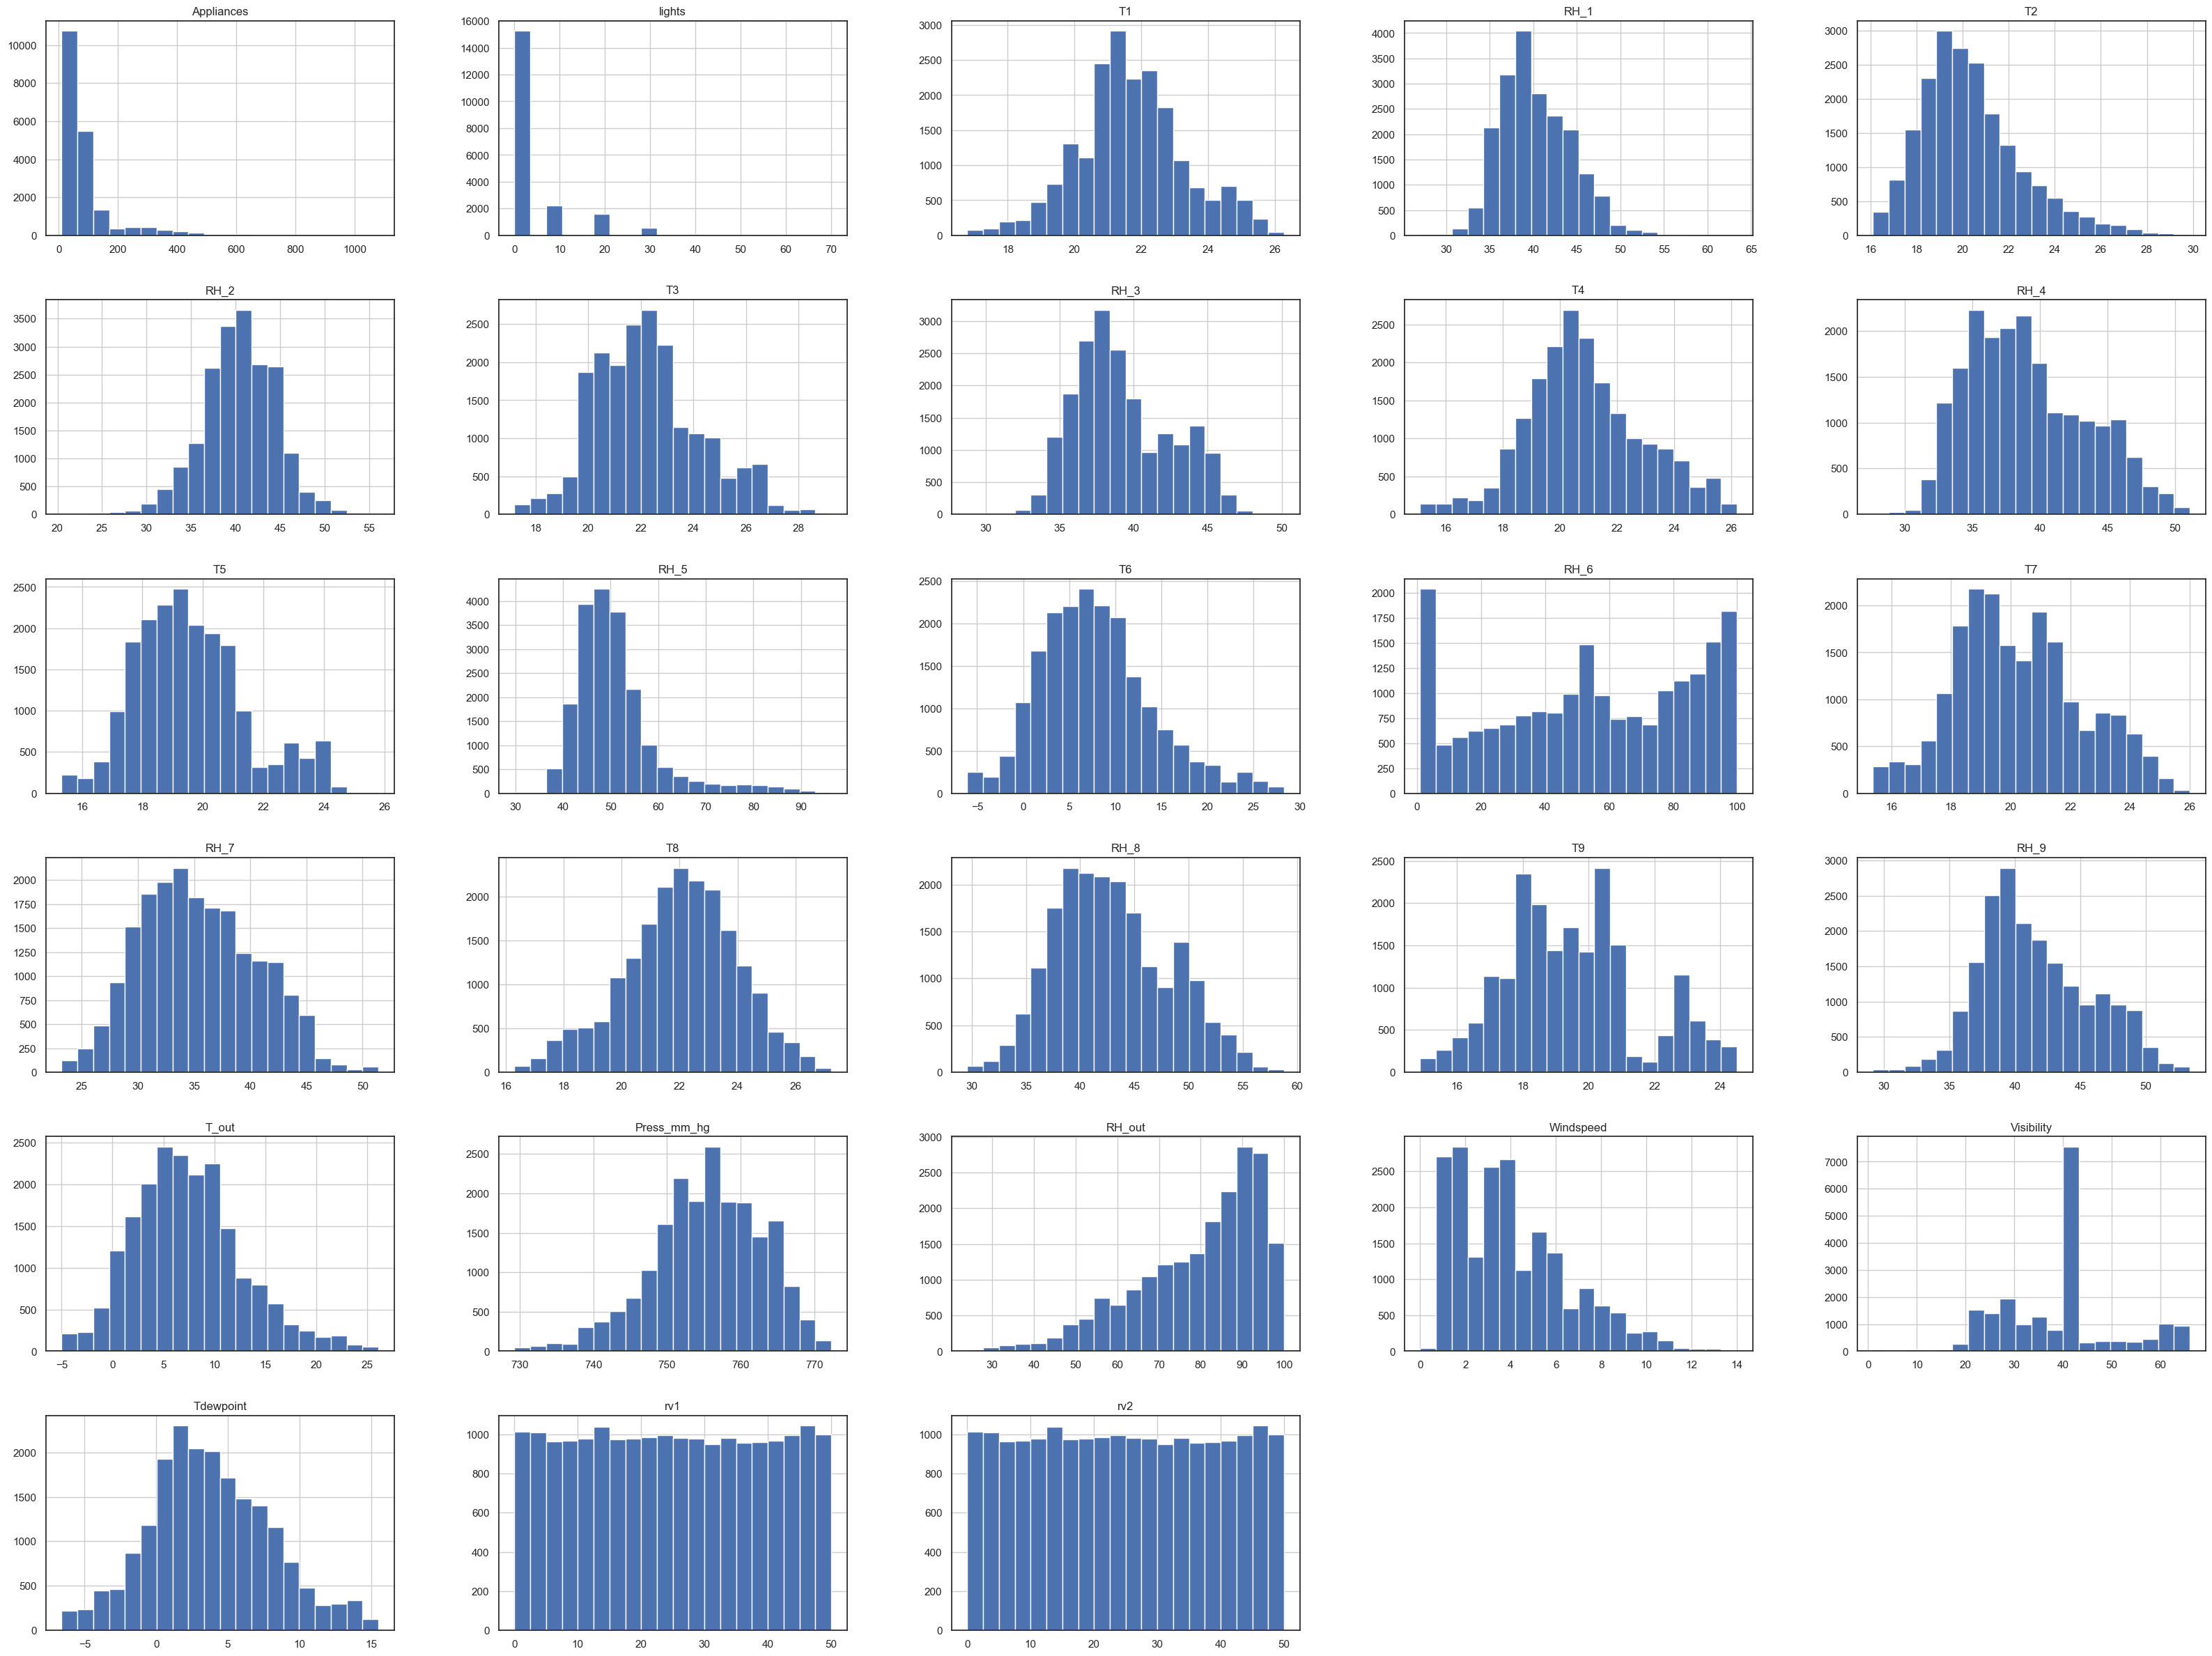

In [107]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(40,30))
plt.show()

above code visualizing the distribution of the values in the DataFrame using a histogram with 20 bins and a figure size of 40 by 30 inches.

The scatter plot matrix is useful for visualizing the relationship between multiple variables in a dataset.

First, the pandas melt() function is used to transform the original dataframe df into a new dataframe called melted_df. The id_vars parameter specifies which column(s) to keep as identifier variables (in this case, the 'Appliances' column), and the remaining columns are melted into two new columns: 'Attribute' (which contains the original column names) and 'Value' (which contains the values from the original columns).

Next, seaborn's boxplot() function is used to create the boxplot, with the 'Attribute' column as the x-axis and the 'Value' column as the y-axis. The data parameter is set to the melted dataframe melted_df.

The plt.xticks() function is used to rotate the x-axis labels by 90 degrees to make them easier to read. Finally, the plt.title() function is used to set the title of the plot to 'Boxplot of all attributes', and plt.show() is used to display the plot.

it creates a boxplot of all the attributes in the melted DataFrame.

This code snippet is used to create kernel density estimation (KDE) plots for each column in a given dataframe using the Python libraries pandas and seaborn.

The for loop iterates through each column in the dataframe df.

Within the loop, a new figure is created using plt.figure(figsize=(11, 8)), which sets the size of the figure to be 11 inches wide and 8 inches tall.

Next, seaborn's kdeplot() function is used to create a KDE plot of the values in the current column. The df[col] argument specifies the column to be plotted. The resulting plot is stored in the variable ax.

The ax.set_title() function is used to set the title of the plot to the current column name plus the phrase 'in Energy Attributes'.

Finally, plt.show() is used to display the plot. This process is repeated for each column in the dataframe, resulting in a separate KDE plot for each column.

KDE plots are a type of plot used to estimate the probability density function of a random variable. They are similar to histograms, but are smoother and can provide more information about the underlying distribution of the data.

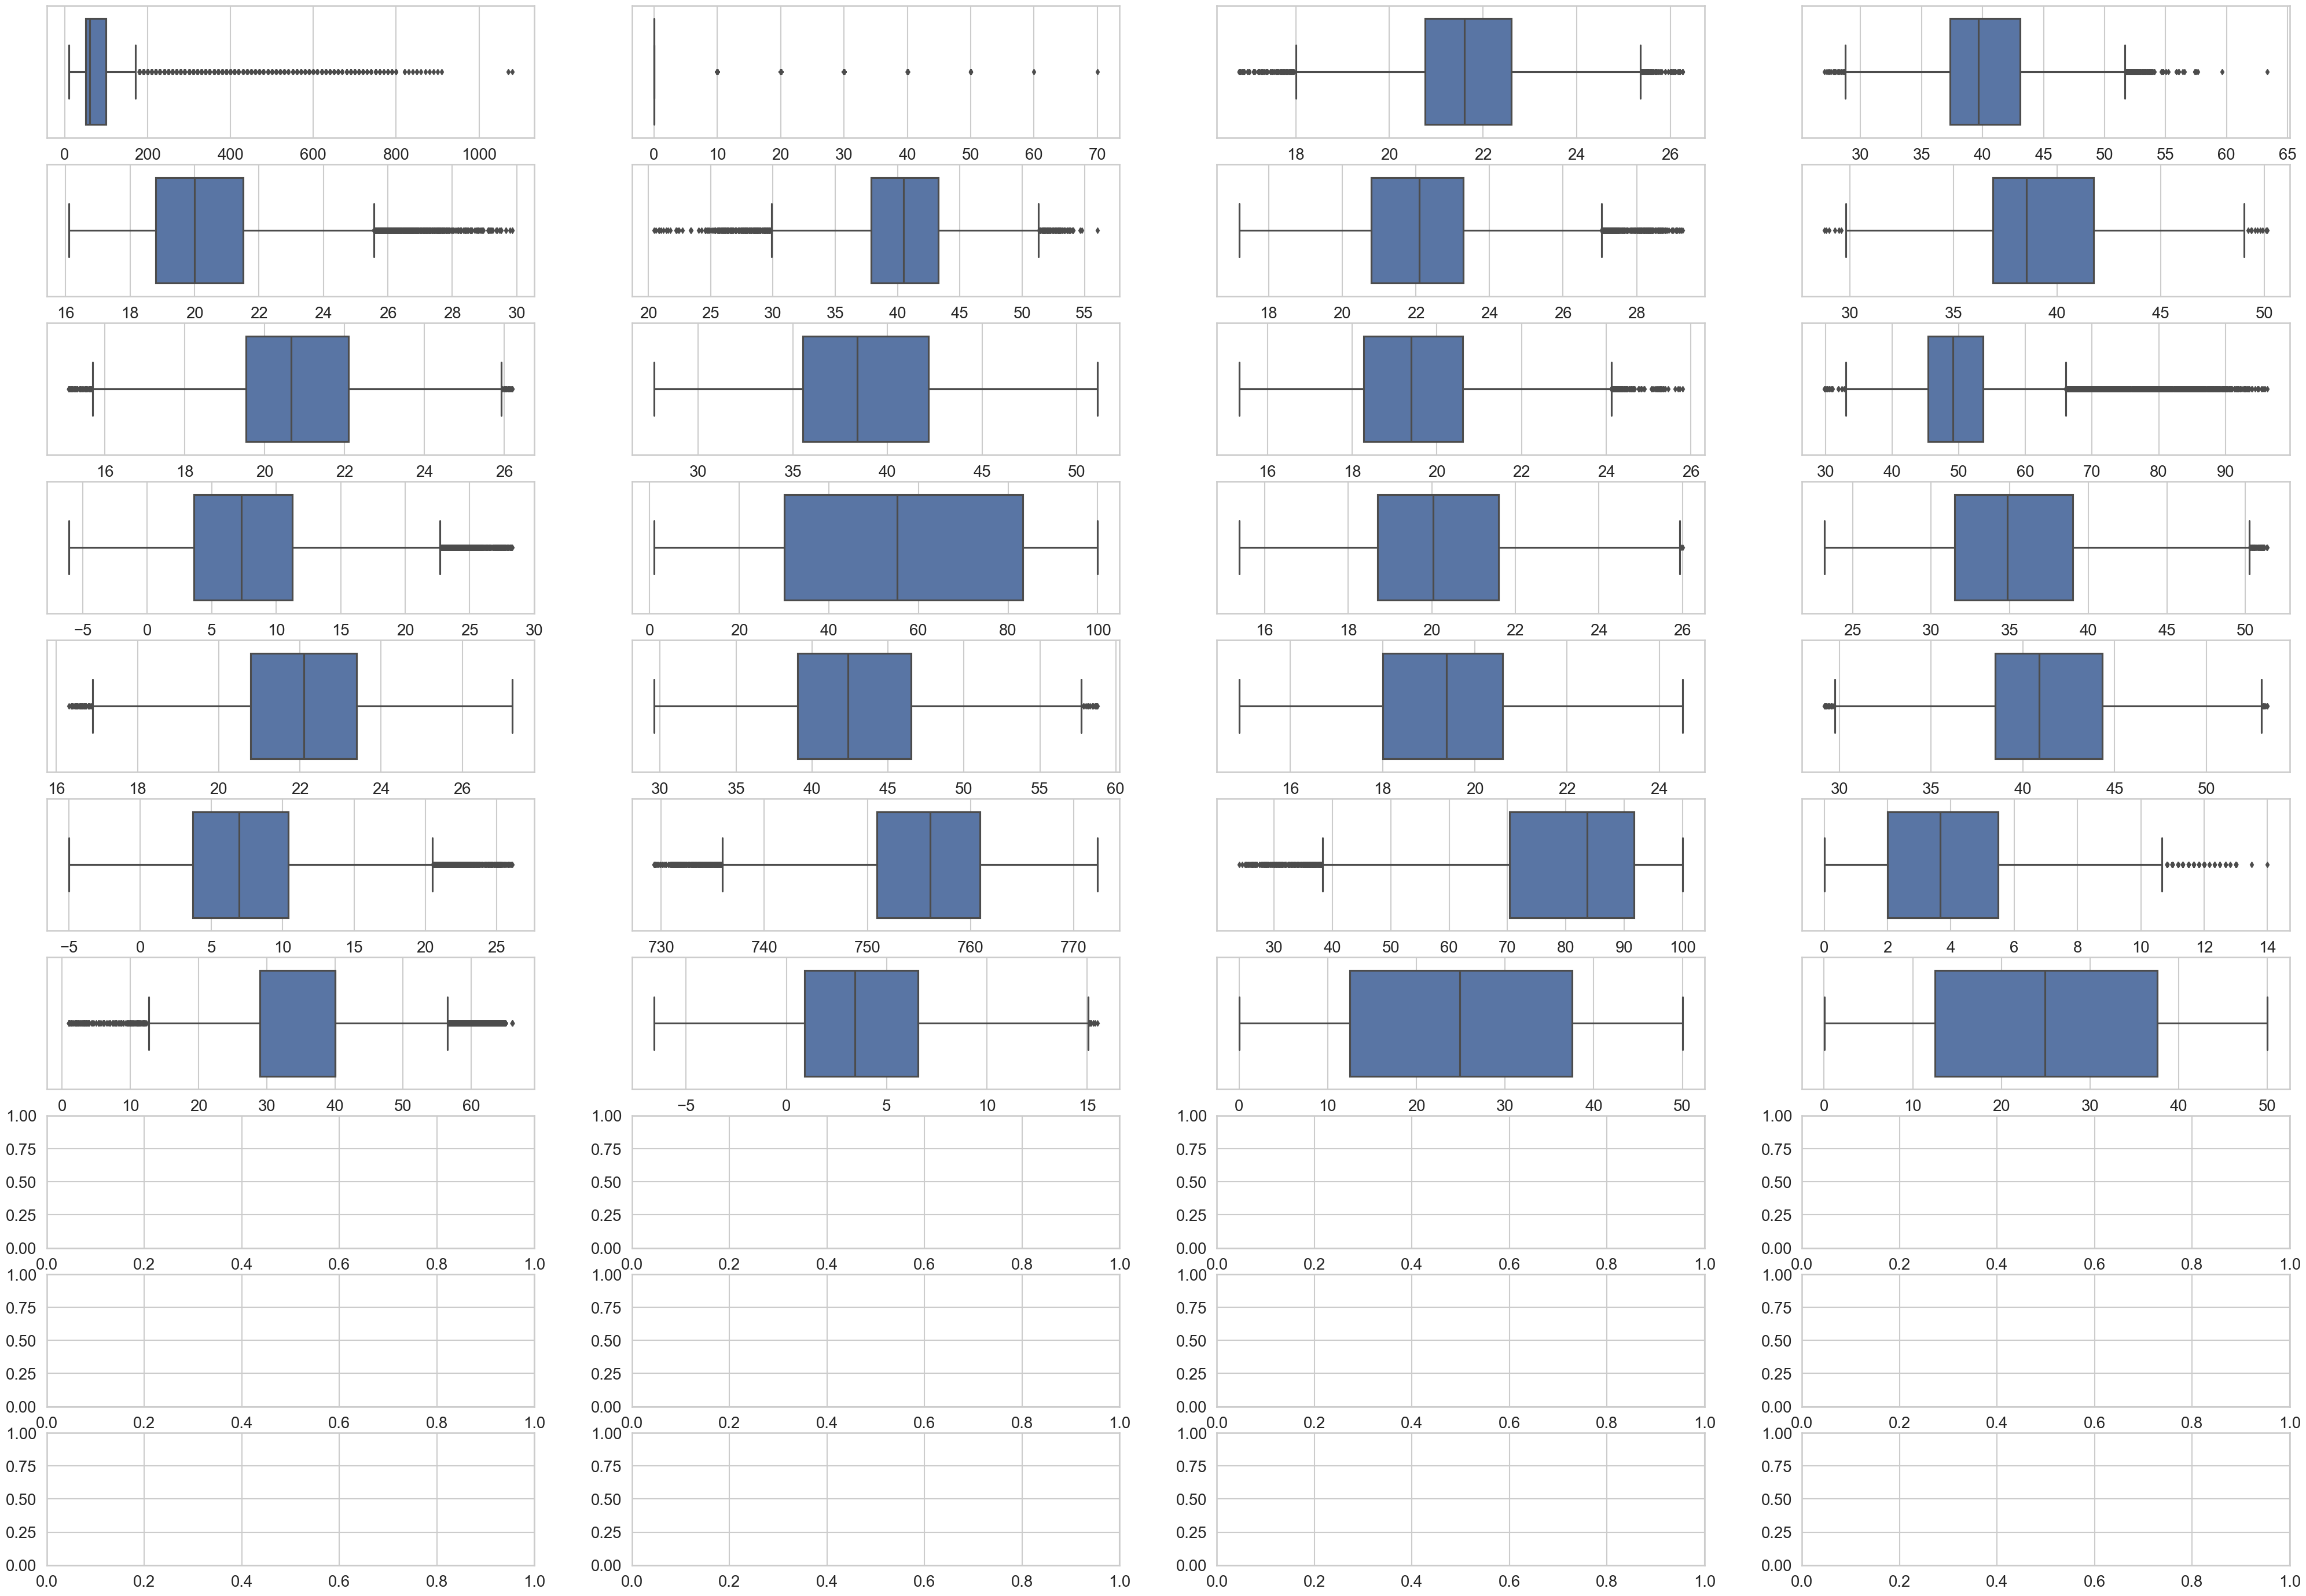

In [111]:
fig, axs = plt.subplots(10, 4, figsize=(50, 35))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axs[i])
plt.show()

This code snippet creates a grid of boxplots, with each boxplot showing the distribution of values for a different column in a given dataframe. It uses the Python libraries pandas and seaborn, and the subplots() function from matplotlib.

The fig, axs = plt.subplots(10, 4, figsize=(50, 35)) line creates a grid of 10 rows and 4 columns of subplots. The figsize argument sets the size of the overall figure to be 50 inches wide and 35 inches tall. The resulting figure object is stored in the variable fig, and the array of subplot objects is stored in the variable axs.

The axs = axs.flatten() line flattens the 2D array of subplots into a 1D array, so that each subplot can be accessed using a single index.

The for loop iterates through each column in the dataframe df, and for each column it creates a boxplot using seaborn's boxplot() function. The data parameter is set to the dataframe df, and the x parameter is set to the current column. The ax parameter is set to the corresponding subplot in the axs array, using the i index variable.

Finally, plt.show() is used to display the grid of boxplots. The resulting grid of boxplots provides a visual summary of the distribution of values for each column in the dataframe.

This code snippet is used to create a heatmap of the correlation matrix for a given dataframe using the Python libraries pandas, seaborn, and matplotlib.

The corr() method is applied to the dataframe df to calculate the correlation between all pairs of columns. The resulting correlation matrix is stored in the variable corr_matrix.

The sns.set() function is used to set the style of the plot to 'white'. The plt.figure() function is used to create a new figure object with a size of 30 inches wide and 20 inches tall.

Next, seaborn's heatmap() function is used to create the heatmap. The data parameter is set to the correlation matrix corr_matrix. The annot parameter is set to True, which displays the correlation coefficients in each cell of the heatmap. The cmap parameter is set to 'coolwarm', which is a color map that ranges from blue (low correlation) to red (high correlation). The vmin and vmax parameters are set to -1 and 1, respectively, which sets the range of the color map.

The plt.title() function is used to set the title of the plot to 'Correlation matrix of attributes', with a font size of 20. Finally, plt.show() is used to display the plot. The resulting heatmap provides a visual summary of the correlation between pairs of attributes in the dataframe.

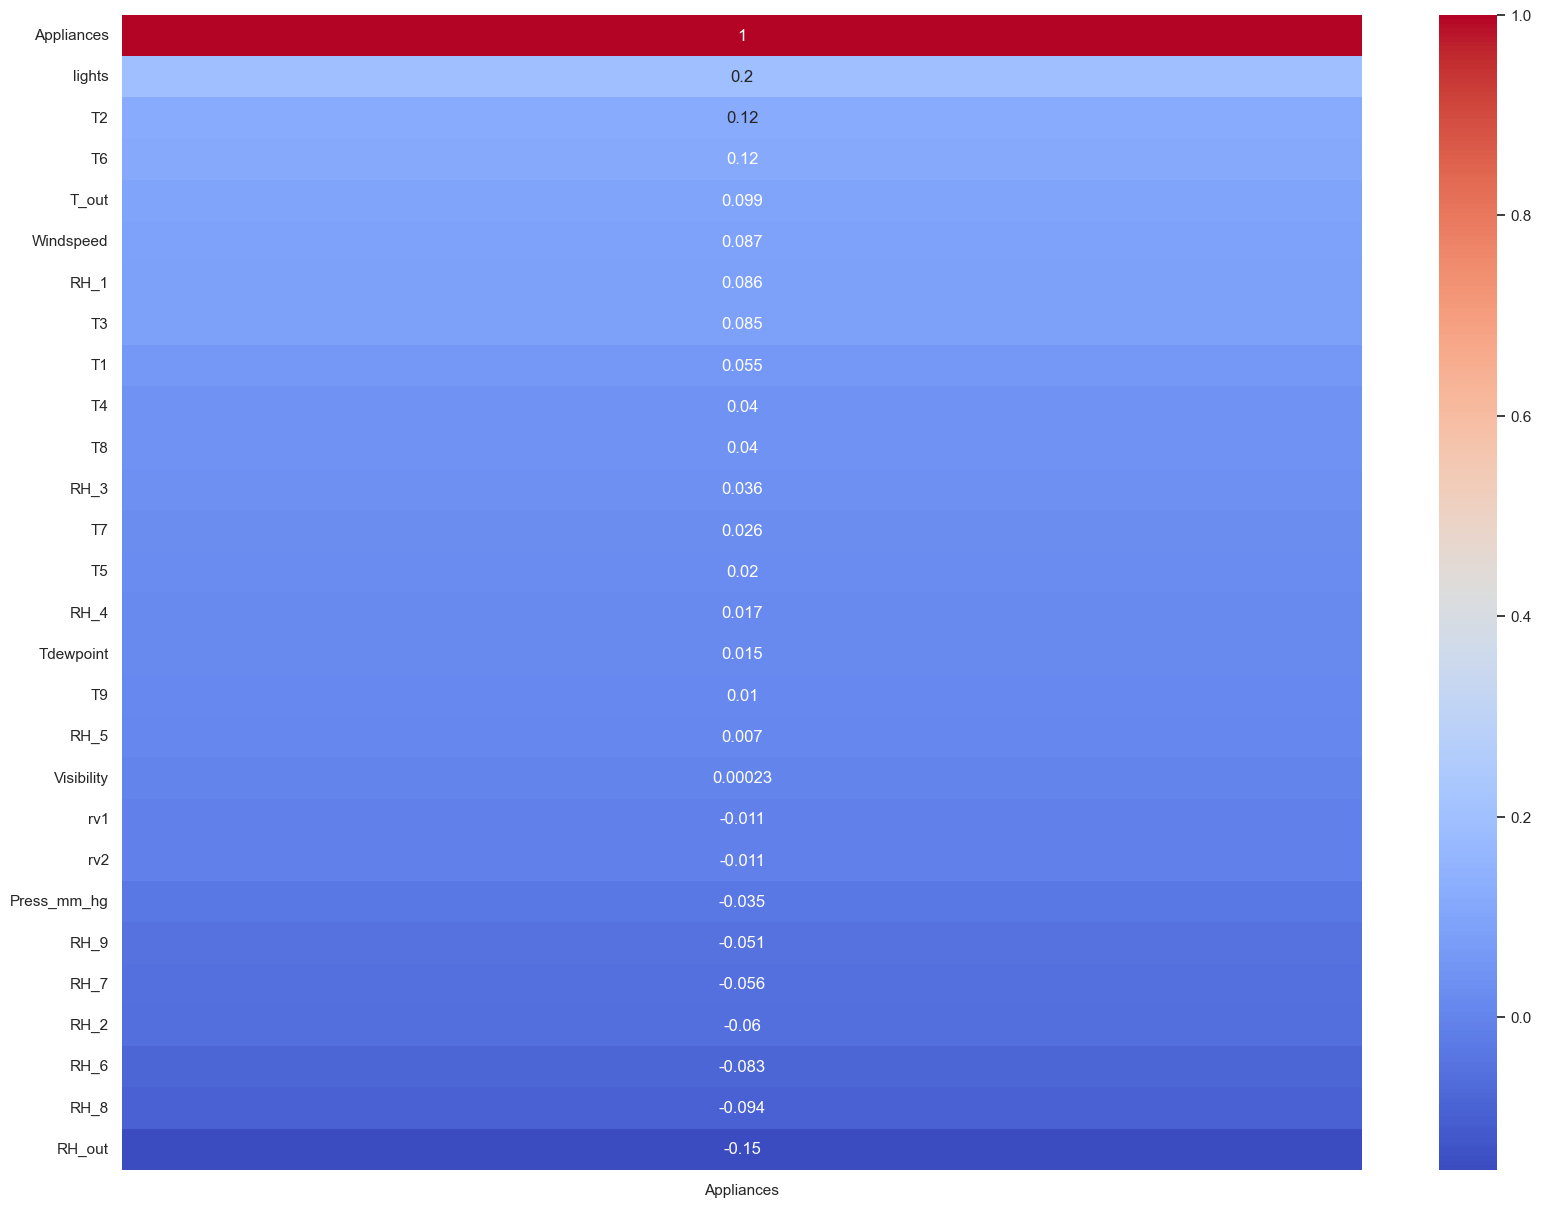

In [113]:
cm = corr_matrix[['Appliances']].sort_values(by='Appliances', ascending=False)
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.show()

This code snippet is used to create a heatmap that shows the correlation between the 'Appliances' column and all other columns in a given dataframe, using the Python libraries pandas, seaborn, and matplotlib.

The corr() method is applied to the dataframe df to calculate the correlation between all pairs of columns. The resulting correlation matrix is stored in the variable corr_matrix.

The corr_matrix[['Appliances']] syntax selects only the row of the correlation matrix that corresponds to the 'Appliances' column, and stores it in a new dataframe cm. The sort_values() method sorts the rows of cm in descending order based on the values in the 'Appliances' column.

The plt.figure() function is used to create a new figure object with a size of 20 inches wide and 15 inches tall.

Next, seaborn's heatmap() function is used to create the heatmap. The data parameter is set to the dataframe cm. The cmap parameter is set to 'coolwarm', which is a color map that ranges from blue (low correlation) to red (high correlation). The annot parameter is set to True, which displays the correlation coefficients in each cell of the heatmap.

Finally, plt.show() is used to display the plot. The resulting heatmap provides a visual summary of the correlation between the 'Appliances' column and all other columns in the dataframe. The red cells indicate positive correlation, while blue cells indicate negative correlation. The intensity of the color indicates the strength of the correlation.

In [114]:
cm

,Appliances
Appliances,1.000000
lights,0.197278
T2,0.120075
T6,0.117635
T_out,0.099152
Windspeed,0.087127
RH_1,0.086039
T3,0.085068
T1,0.055447
T4,0.040276


In [115]:
from scipy.stats import spearmanr

correlations = {}
for col in df.columns[:-1]:
    rho, p = spearmanr(df[col].values, df['Appliances'].values)
    correlations[col] = abs(rho)

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

for feature, corr in sorted_correlations:
    print(f"Spearman correlation between Appliances and {feature} is {corr:.4f}")

Spearman correlation between Appliances and Appliances is 1.0000
Spearman correlation between Appliances and T2 is 0.3051
Spearman correlation between Appliances and lights is 0.3024
Spearman correlation between Appliances and RH_out is 0.2691
Spearman correlation between Appliances and T1 is 0.2440
Spearman correlation between Appliances and T6 is 0.2425
Spearman correlation between Appliances and T8 is 0.2361
Spearman correlation between Appliances and RH_6 is 0.2297
Spearman correlation between Appliances and RH_8 is 0.2172
Spearman correlation between Appliances and T3 is 0.2169
Spearman correlation between Appliances and T_out is 0.2155
Spearman correlation between Appliances and T4 is 0.2072
Spearman correlation between Appliances and T5 is 0.1859
Spearman correlation between Appliances and T7 is 0.1819
Spearman correlation between Appliances and T9 is 0.1670
Spearman correlation between Appliances and RH_9 is 0.1646
Spearman correlation between Appliances and RH_2 is 0.1197
Spea

In [5]:
import pandas as pd
import statsmodels.api as sm


# Separate the target variable from the predictors
y = df['Appliances']
X = df.drop(['Appliances'], axis=1)

# Perform backward selection
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

# Print the selected features
print(cols)

['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


In [6]:
cols = list(X.columns)
selected_features = []
while (len(cols) > 0):
    remaining_features = list(set(cols) - set(selected_features))
    pval = []
    for feature in remaining_features:
        X_1 = X[selected_features + [feature]]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = model.pvalues[-1]
        pval.append(p)
    min_pval = min(pval)
    if (min_pval < 0.05):
        selected_features.append(remaining_features[pval.index(min_pval)])
    else:
        break

# Print the selected features
print(selected_features)

['lights', 'RH_out', 'RH_1', 'RH_8', 'RH_2', 'RH_7', 'Windspeed', 'T3', 'T9', 'T2', 'T8', 'T6', 'RH_3', 'T_out', 'T4', 'RH_6', 'Tdewpoint', 'Visibility', 'RH_9']


In [7]:
final_df = df[['T2', 'T3', 'T4', 'T6', 'T8', 'T9', 'T_out',  'RH_1', 'RH_2', 'RH_3', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out', 'lights', 'Tdewpoint', 'Visibility', 'Windspeed']]

final_df

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,19.20,19.79,19.00,7.03,18.20,17.03,6.60,47.60,44.79,44.73,84.26,41.63,48.90,45.53,92.00,30,5.30,63.00,7.00
1,19.20,19.79,19.00,6.83,18.20,17.07,6.48,46.69,44.72,44.79,84.06,41.56,48.86,45.56,92.00,30,5.20,59.17,6.67
2,19.20,19.79,18.93,6.56,18.20,17.00,6.37,46.30,44.63,44.93,83.16,41.43,48.73,45.50,92.00,30,5.10,55.33,6.33
3,19.20,19.79,18.89,6.43,18.10,17.00,6.25,46.07,44.59,45.00,83.42,41.29,48.59,45.40,92.00,40,5.00,51.50,6.00
4,19.20,19.79,18.89,6.37,18.10,17.00,6.13,46.33,44.53,45.00,84.89,41.23,48.59,45.40,92.00,40,4.90,47.67,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.89,27.20,24.70,24.80,24.70,23.20,22.73,46.56,42.03,41.16,1.00,44.50,50.07,46.79,55.67,0,13.33,23.67,3.33
19731,25.75,27.13,24.70,24.20,24.70,23.20,22.60,46.50,42.08,41.22,1.00,44.41,49.79,46.79,56.00,0,13.30,24.50,3.50
19732,25.63,27.05,24.70,23.63,24.70,23.20,22.47,46.60,42.77,41.69,1.00,44.40,49.66,46.79,56.33,10,13.27,25.33,3.67
19733,25.41,26.89,24.70,22.43,24.66,23.20,22.33,46.99,43.04,41.29,1.00,44.30,49.52,46.82,56.67,10,13.23,26.17,3.83


In [119]:
len(final_df.columns)

19

In [120]:
final_df.shape

(19735, 19)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(final_df)

#standardization data after performing standardization
scaled_df=pd.DataFrame(data=X_scale, columns = final_df.columns)
scaled_df

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.479080,2.281368,-1.243030,-0.289560
19731,2.466461,2.423846,1.882029,2.674637,1.365417,1.843579,2.856414,1.568241,0.407793,0.607634,-1.721052,1.764118,1.311950,1.261650,-1.593912,-0.479080,2.274216,-1.172658,-0.220204
19732,2.411740,2.383967,1.882029,2.581044,1.365417,1.843579,2.831965,1.593372,0.577339,0.752050,-1.721052,1.762163,1.287065,1.261650,-1.571765,0.781035,2.267063,-1.102286,-0.150849
19733,2.311418,2.304210,1.882029,2.384007,1.344968,1.843579,2.805636,1.691383,0.643683,0.629143,-1.721052,1.742609,1.260267,1.268876,-1.548948,0.781035,2.257527,-1.031066,-0.085573


In [122]:
scaled_df.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098


In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

cutoffs = [0, 60, np.inf]

# Create a list of class labels
class_labels = [0, 1]

# Map the target variable values to the corresponding classes
scaled_df['Appliances'] = pd.cut(df['Appliances'], bins=cutoffs, labels=class_labels)
scaled_df


,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed,Appliances
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702,0
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071,0
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360,0
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729,0
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.479080,2.281368,-1.243030,-0.289560,1
19731,2.466461,2.423846,1.882029,2.674637,1.365417,1.843579,2.856414,1.568241,0.407793,0.607634,-1.721052,1.764118,1.311950,1.261650,-1.593912,-0.479080,2.274216,-1.172658,-0.220204,1
19732,2.411740,2.383967,1.882029,2.581044,1.365417,1.843579,2.831965,1.593372,0.577339,0.752050,-1.721052,1.762163,1.287065,1.261650,-1.571765,0.781035,2.267063,-1.102286,-0.150849,1
19733,2.311418,2.304210,1.882029,2.384007,1.344968,1.843579,2.805636,1.691383,0.643683,0.629143,-1.721052,1.742609,1.260267,1.268876,-1.548948,0.781035,2.257527,-1.031066,-0.085573,1


 In the above code, we are only interested in two classes, where the target variable value is less than or equal to 50 or greater than 50. Therefore, we combine the two classes with values greater than 50 into one class and label it as 1. The target variable values less than or equal to 50 are labeled as 0.

In [124]:
scaled_df['Appliances'].value_counts()

0    10744
1     8991
Name: Appliances, dtype: int64

In [125]:
scaled_df.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed,Appliances
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702,0
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071,0
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360,0
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729,0
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098,0


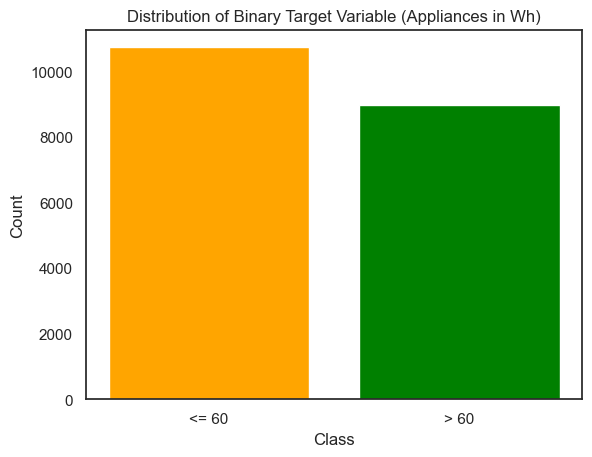

In [126]:
import matplotlib.pyplot as plt
counts = scaled_df['Appliances'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values, color=['Orange', 'Green'])
plt.xticks([0, 1], ['<= 60', '> 60'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Binary Target Variable (Appliances in Wh)')
plt.show()


In [10]:
X = scaled_df.iloc[:, :-1]
y = scaled_df['Appliances']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
X_train.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
2133,-0.520394,-0.935954,-0.859266,0.523643,-2.003501,-1.149480,0.543198,1.316932,1.147408,1.550948,1.406817,1.586178,1.352147,1.721736,0.385860,-0.47908,0.998749,-1.257444,1.411689
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.47908,2.281368,-1.243030,-0.289560
3288,0.542106,-0.153330,0.560333,-0.226742,-0.745908,-0.439683,-0.152647,1.048031,0.533110,1.633910,0.219941,-0.208873,-0.307442,0.958137,-1.057025,-0.47908,-0.848890,0.141522,1.615675
7730,-1.432410,-0.831272,-1.206823,-0.840843,-0.781693,-0.543919,-0.998945,-0.552811,0.125216,-0.639875,0.812897,-0.662524,-0.066256,-0.200509,0.978449,-0.47908,-0.603333,0.876614,-1.240137
8852,-1.478011,-0.985803,-0.663459,-1.408968,0.342983,-0.275884,-1.557502,-1.248938,-0.154904,-0.689038,0.446915,-0.351617,-0.703676,-0.352265,0.844227,-0.47908,-1.356693,-0.367193,-0.966795


In [129]:
X_test.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
8980,-1.177046,-0.985803,-0.536185,-1.101918,0.532133,-0.097194,-1.061007,-1.221294,-0.309707,-0.719765,0.295706,-0.337929,-0.609881,-0.607601,0.575783,-0.479080,-0.896571,2.091595,-0.697533
2754,0.432664,-0.317831,-0.159257,-0.883535,-0.720347,-1.586279,-0.886105,3.226884,1.213752,3.068853,1.363798,0.772734,0.885089,0.637763,0.687859,0.781035,-0.610485,-0.960694,-0.424191
9132,-1.236327,-0.297891,-0.276741,-1.343289,0.036253,-0.047558,-1.356271,-1.196163,0.026928,-1.242121,-0.118111,-1.583515,-0.632851,-0.785855,0.218082,-0.479080,-1.468743,2.261166,-0.832164
14359,1.618285,-0.118436,0.751245,0.533495,-0.423842,0.399167,0.270502,0.193578,-1.371213,-0.710547,-1.422487,-0.977343,-0.927634,-0.720816,-0.598657,-0.479080,-0.009704,0.141522,0.461111
8875,-1.769857,-1.130364,-0.780943,-1.418820,0.036253,-0.241139,-1.482275,-1.289147,-0.071359,-0.873399,0.533595,-0.259713,-0.640508,-0.205327,0.911338,-0.479080,-1.242258,0.890180,-0.016218


In [130]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

acc_logreg_train = accuracy_score(y_train, y_train_pred)
acc_logreg = accuracy_score(y_test, y_pred)

print('Logistic Regression of Training Set: {:.2f}%'.format(acc_logreg_train*100))
print('Logistic Regression of Testing Set: {:.2f}%'.format(acc_logreg*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

y_scores_list1 =[]
test_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_logreg.tolist())

Logistic Regression of Training Set: 76.06%
Logistic Regression of Testing Set: 76.21%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      8617
           1       0.75      0.72      0.73      7171

    accuracy                           0.76     15788
   macro avg       0.76      0.76      0.76     15788
weighted avg       0.76      0.76      0.76     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2127
           1       0.75      0.72      0.74      1820

    accuracy                           0.76      3947
   macro avg       0.76      0.76      0.76      3947
weighted avg       0.76      0.76      0.76      3947



In [132]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_pred = nb.predict(X_test)

acc_nb_train = accuracy_score(y_train, y_train_pred)
acc_nb = accuracy_score(y_test, y_pred)

print('Naive Bayes of Training Set: {:.2f}%'.format(acc_nb_train*100))
print('Naive Bayes of Testing Set: {:.2f}%'.format(acc_nb*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

test_prob_nb = nb.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_nb.tolist())

Naive Bayes of Training Set: 66.66%
Naive Bayes of Testing Set: 67.37%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      8617
           1       0.64      0.60      0.62      7171

    accuracy                           0.67     15788
   macro avg       0.66      0.66      0.66     15788
weighted avg       0.67      0.67      0.67     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2127
           1       0.66      0.60      0.63      1820

    accuracy                           0.67      3947
   macro avg       0.67      0.67      0.67      3947
weighted avg       0.67      0.67      0.67      3947



In [133]:
# knn 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

acc_knn_train = accuracy_score(y_train, y_train_pred)
acc_knn = accuracy_score(y_test, y_pred)

print('K-Nearest Neighbors of Training Set: {:.2f}%'.format(acc_knn_train*100))
print('K-Nearest Neighbors of Testing Set: {:.2f}%'.format(acc_knn*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

test_prob_knn = knn.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_knn.tolist())

K-Nearest Neighbors of Training Set: 92.29%
K-Nearest Neighbors of Testing Set: 87.36%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8617
           1       0.93      0.90      0.91      7171

    accuracy                           0.92     15788
   macro avg       0.92      0.92      0.92     15788
weighted avg       0.92      0.92      0.92     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2127
           1       0.88      0.84      0.86      1820

    accuracy                           0.87      3947
   macro avg       0.87      0.87      0.87      3947
weighted avg       0.87      0.87      0.87      3947



In [134]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

acc_dt_train = accuracy_score(y_train, y_train_pred)
acc_dt = accuracy_score(y_test, y_pred)

print('Decision Tree of Training Set: {:.2f}%'.format(acc_dt_train*100))
print('Decision Tree of Testing Set: {:.2f}%'.format(acc_dt*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)


Decision Tree of Training Set: 100.00%
Decision Tree of Testing Set: 85.63%


Classification report of training test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2127
           1       0.85      0.84      0.84      1820

    accuracy                           0.86      3947
   macro avg       0.86      0.85      0.86      3947
weighted avg       0.86      0.86      0.86      3947



In [135]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

acc_rf_train = accuracy_score(y_train, y_train_pred)
acc_rf = accuracy_score(y_test, y_pred)

print('Random Forest of Training Set: {:.2f}%'.format(acc_rf_train*100))
print('Random Forest of Testing Set: {:.2f}%'.format(acc_rf*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report: of Testing test:")
print(report_test)

test_prob_rf = rf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_rf.tolist())

Random Forest of Training Set: 100.00%
Random Forest of Testing Set: 89.56%


Classification report of training test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788



Classification report: of Testing test:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2127
           1       0.89      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.89      0.89      3947
weighted avg       0.90      0.90      0.90      3947



In [136]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# create gradient boosting classifier
gb = GradientBoostingClassifier()

# fit the classifier on the training data
gb.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = gb.predict(X_train)
y_pred = gb.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_gb_train = accuracy_score(y_train, y_train_pred)
acc_gb = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Gradient Boosting of Training Set: {:.2f}%'.format(acc_gb_train*100))
print('Gradient Boosting of Testing Set: {:.2f}%'.format(acc_gb*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)


Gradient Boosting of Training Set: 81.77%
Gradient Boosting of Testing Set: 81.10%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      8617
           1       0.81      0.78      0.79      7171

    accuracy                           0.82     15788
   macro avg       0.82      0.81      0.82     15788
weighted avg       0.82      0.82      0.82     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2127
           1       0.81      0.77      0.79      1820

    accuracy                           0.81      3947
   macro avg       0.81      0.81      0.81      3947
weighted avg       0.81      0.81      0.81      3947



In [137]:
#Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# create SVM classifier
svm = SVC()

# fit the classifier on the training data
svm.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_svm_train = accuracy_score(y_train, y_train_pred)
acc_svm = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Support Vector Machine of Training Set: {:.2f}%'.format(acc_svm_train*100))
print('Support Vector Machine of Testing Set: {:.2f}%'.format(acc_svm*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)


Support Vector Machine of Training Set: 84.08%
Support Vector Machine of Testing Set: 83.30%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8617
           1       0.84      0.80      0.82      7171

    accuracy                           0.84     15788
   macro avg       0.84      0.84      0.84     15788
weighted avg       0.84      0.84      0.84     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2127
           1       0.84      0.79      0.81      1820

    accuracy                           0.83      3947
   macro avg       0.83      0.83      0.83      3947
weighted avg       0.83      0.83      0.83      3947



In [138]:
# MULTI LAYER PERCEPTRON

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
alpha=0.0001, batch_size='auto', learning_rate='constant',
learning_rate_init=0.001, max_iter=200, shuffle=True,
random_state=42, tol=0.0001)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_mlp_train = accuracy_score(y_train, y_train_pred)
acc_mlp = accuracy_score(y_test, y_pred)

print('Multi-layer Perceptron of Training Set: {:.2f}%'.format(acc_mlp_train*100))
print('Multi-layer Perceptron of Testing Set: {:.2f}%'.format(acc_mlp*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report: of Testing test:")
print(report_test)

test_prob_mlp = mlp.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_mlp.tolist())

Multi-layer Perceptron of Training Set: 88.33%
Multi-layer Perceptron of Testing Set: 86.07%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8617
           1       0.88      0.86      0.87      7171

    accuracy                           0.88     15788
   macro avg       0.88      0.88      0.88     15788
weighted avg       0.88      0.88      0.88     15788



Classification report: of Testing test:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2127
           1       0.86      0.84      0.85      1820

    accuracy                           0.86      3947
   macro avg       0.86      0.86      0.86      3947
weighted avg       0.86      0.86      0.86      3947



In [139]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

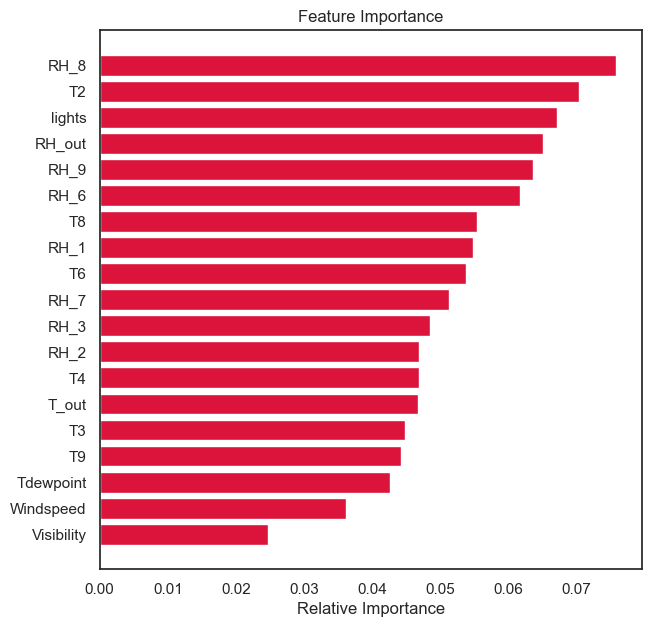

In [140]:
feature_importance = rf.feature_importances_
feature_names = X.columns.tolist()  # Get the names of the features from the input data X
sorted_idx = np.argsort(feature_importance)

# Create a horizontal bar chart to display the relative feature importance
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.yticks(pos, [feature_names[i] for i in sorted_idx])  # Set the y-tick labels to the feature names
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.show()


In [141]:
X_train

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
2133,-0.520394,-0.935954,-0.859266,0.523643,-2.003501,-1.149480,0.543198,1.316932,1.147408,1.550948,1.406817,1.586178,1.352147,1.721736,0.385860,-0.47908,0.998749,-1.257444,1.411689
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.47908,2.281368,-1.243030,-0.289560
3288,0.542106,-0.153330,0.560333,-0.226742,-0.745908,-0.439683,-0.152647,1.048031,0.533110,1.633910,0.219941,-0.208873,-0.307442,0.958137,-1.057025,-0.47908,-0.848890,0.141522,1.615675
7730,-1.432410,-0.831272,-1.206823,-0.840843,-0.781693,-0.543919,-0.998945,-0.552811,0.125216,-0.639875,0.812897,-0.662524,-0.066256,-0.200509,0.978449,-0.47908,-0.603333,0.876614,-1.240137
8852,-1.478011,-0.985803,-0.663459,-1.408968,0.342983,-0.275884,-1.557502,-1.248938,-0.154904,-0.689038,0.446915,-0.351617,-0.703676,-0.352265,0.844227,-0.47908,-1.356693,-0.367193,-0.966795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.433752,0.365096,0.315575,0.260926,1.094472,0.433913,0.405910,0.160908,0.655969,-0.074501,-0.185529,-0.253847,0.485026,-0.239051,-0.139619,-0.47908,0.493330,0.141522,1.073071
11964,0.756430,0.215550,0.212776,1.638547,1.109808,0.399167,1.859662,0.864575,0.405336,0.610707,-1.104017,0.913522,0.777895,0.659443,-0.922803,-0.47908,1.702044,0.141522,-0.832164
5390,-0.976402,-1.080515,-1.299831,-1.642130,-0.393169,-0.792100,-1.595115,-1.145901,-0.695486,-0.507750,0.908245,-1.053603,-0.236617,-0.501613,0.486526,-0.47908,-1.595098,2.063615,-0.150849
860,0.040497,-0.532180,0.119768,-1.101918,0.342983,-0.489320,-1.004587,-1.181084,-1.302412,-0.719765,1.355451,-0.899127,-0.661564,-0.019847,-1.034878,-0.47908,-1.866879,0.141522,-1.105506


In [142]:
# Constructing a bagged-tree classifier IN Decision tree CLASSIFIER

from sklearn import tree 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=18, random_state=3)
bag_clf.fit(X_train, y_train)

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged Trees Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

test_prob_bag_clf = bag_clf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_bag_clf.tolist())

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8617
           1       1.00      0.99      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.91      0.90      2127
           1       0.89      0.86      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.88      0.89      3947
weighted avg       0.89      0.89      0.89      3947



In [143]:
# Constructing a bagged-tree classifier IN Random forest CLASSIFIER

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=10, random_state=42)
bag_rf = BaggingClassifier(base_estimator=rf, n_estimators=5, random_state=42)

# Define the hyperparameters to tune
param_grid = {
"base_estimator__max_depth": [2, 4, 6],
"base_estimator__min_samples_split": [2, 4, 6],
"base_estimator__min_samples_leaf": [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=bag_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy in training: {grid_search.best_score_}")

# Make predictions on the testing data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy in testing: {accuracy}")

Best hyperparameters: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 6}
Accuracy in training: 0.7804035103591785
Accuracy in testing: 0.7881935647327084


In [144]:
# Constructing a bagged-SVC classifier

bag_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=3)
bag_clf.fit(X_train, y_train)

# Finding the predictions of the bagged-SVC classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged SVC Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged SVC Classifier Test Classification Report: \n\n', test_report)

Bagged SVC Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8617
           1       0.84      0.79      0.82      7171

    accuracy                           0.84     15788
   macro avg       0.84      0.84      0.84     15788
weighted avg       0.84      0.84      0.84     15788
 


Bagged SVC Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2127
           1       0.84      0.79      0.81      1820

    accuracy                           0.83      3947
   macro avg       0.83      0.83      0.83      3947
weighted avg       0.83      0.83      0.83      3947



In [145]:
# Bagging classifier with Random Forest

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [2, 4, 6, 8],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0]
}

rf = RandomForestClassifier(max_depth=4)
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
grid_search = GridSearchCV(bagged_rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

this code demonstrates how to use GridSearchCV in scikit-learn to perform hyperparameter tuning for a bagged random forest classifier with a specific base estimator.

In [146]:
print("Best parameters:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_)
print("Test accuracy:", grid_search.score(X_test, y_test))

Best parameters: {'base_estimator__max_depth': 8, 'max_samples': 1.0, 'n_estimators': 200}
Training accuracy: 0.8236001783785962
Test accuracy: 0.8335444641499873


In [147]:
# SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Construct the SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42, probability=True)

# Train the classifier on the training data
svm_linear.fit(X_train, y_train)

# Test the classifier on the test data
svm_linear_pred = svm_linear.predict(X_test)
svm_linear_pred_proba = svm_linear.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_linear_acc = accuracy_score(y_test, svm_linear_pred)
#svm_linear_f1 = f1_score(y_test, svm_linear_pred)
#svm_linear_auc = roc_auc_score(y_test, svm_linear_pred_proba)

print("SVM Classifier with Linear Kernel:")
print("Accuracy: {:.4f}".format(svm_linear_acc))
#print("F1 Score: {:.4f}".format(svm_linear_f1))
#print("AUC Score: {:.4f}".format(svm_linear_auc))

SVM Classifier with Linear Kernel:
Accuracy: 0.7603


The code then calculates the accuracy of the classifier using the accuracy_score function from sklearn.metrics. The accuracy is printed to the console using formatted strings. 

In [148]:
# Construct the SVM classifier with an RBF kernel

svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)

# Train the classifier on the training data
svm_rbf.fit(X_train, y_train)

# Test the classifier on the test data
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_rbf_acc = accuracy_score(y_test, svm_rbf_pred)
#svm_rbf_f1 = f1_score(y_test, svm_rbf_pred)
#svm_rbf_auc = roc_auc_score(y_test, svm_rbf_pred_proba)

print("SVM Classifier with RBF Kernel:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))
#print("F1 Score: {:.4f}".format(svm_rbf_f1))
#print("AUC Score: {:.4f}".format(svm_rbf_auc))


SVM Classifier with RBF Kernel:
Accuracy: 0.8330


The classifier is trained on the training dataset using the fit() method: svm_rbf.fit(X_train, y_train).

Then, the classifier is used to make predictions on the test dataset using the predict() method: svm_rbf_pred = svm_rbf.predict(X_test). Additionally, svm_rbf_pred_proba = svm_rbf.predict_proba(X_test)[:, 1] is used to get the predicted probabilities of the positive class.

Finally, the accuracy of the SVM classifier with RBF kernel is calculated using the accuracy_score() function: svm_rbf_acc = accuracy_score(y_test, svm_rbf_pred). 

In [149]:
# Construct the SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', random_state=42, probability=True)

# Train the classifier on the training data
svm_poly.fit(X_train, y_train)

# Test the classifier on the test data
svm_poly_pred = svm_poly.predict(X_test)
svm_poly_pred_proba = svm_poly.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_poly_acc = accuracy_score(y_test, svm_poly_pred)
#svm_poly_f1 = f1_score(y_test, svm_poly_pred)
#svm_poly_auc = roc_auc_score(y_test, svm_poly_pred_proba)

print("SVM Classifier with Polynomial Kernel:")
print("Accuracy: {:.4f}".format(svm_poly_acc))
#print("F1 Score: {:.4f}".format(svm_poly_f1))
#print("AUC Score: {:.4f}".format(svm_poly_auc))

SVM Classifier with Polynomial Kernel:
Accuracy: 0.7963


In this code, an SVM classifier with a polynomial kernel is constructed using the SVC class from scikit-learn's svm module.

The classifier is then tested on the test data using the predict method with X_test as the argument to make predictions on the test set. The predict_proba method is also used to obtain probability estimates for each predicted class, and the probabilities for the positive class are extracted using the indexing [:, 1].

Finally, the accuracy of the classifier on the test set is calculated using the accuracy_score function from scikit-learn's metrics module, with y_test and svm_poly_pred as arguments. 

In [150]:
# Construct the SVM classifier with a sigmoid kernel
svm_sig = SVC(kernel='sigmoid', random_state=42, probability=True)

# Train the classifier on the training data
svm_sig.fit(X_train, y_train)

# Test the classifier on the test data
svm_sig_pred = svm_sig.predict(X_test)
svm_sig_pred_proba = svm_sig.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_sig_acc = accuracy_score(y_test, svm_sig_pred)
#svm_sig_f1 = f1_score(y_test, svm_sig_pred)
#svm_sig_auc = roc_auc_score(y_test, svm_sig_pred_proba)

print("SVM Classifier with Sigmoid Kernel:")
print("Accuracy: {:.4f}".format(svm_sig_acc))
#print("F1 Score: {:.4f}".format(svm_sig_f1))
#print("AUC Score: {:.4f}".format(svm_sig_auc))

SVM Classifier with Sigmoid Kernel:
Accuracy: 0.5825


This code is fitting an SVM classifier with a sigmoid kernel to the training data, and then using the classifier to predict the labels of the test data. The accuracy of the classifier on the test data is then calculated using the accuracy_score function. The code also computes the predicted probabilities for the positive class using the predict_proba method of the SVM classifier, but does not use these probabilities to compute any performance metrics. Finally, the code prints the accuracy of the classifier on the test data.

In [151]:
# Importing 'GridSearchCV' from 'sklearn'
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters 'C', 'gamma', and 'kernel'

param_grid = {'C': [0.01, 0.1, 1, 10, 100],   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'ploy', 'sigmoid']}

# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# Fitting the data
grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) # Presenting best choice

grid_predictions = grid.predict(X_test)  # Compute the predictions of SVM with best choice of hyperparameters

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best choices for hyperparameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.91      0.89      2127
           1       0.89      0.85      0.87      1820

    accuracy                           0.88      3947
   macro avg       0.88      0.88      0.88      3947
weighted avg       0.88      0.88      0.88      3947



This code performs hyperparameter tuning for an SVM classifier using GridSearchCV.

The grid is then fit to the training data using the fit method, and the best hyperparameters are obtained using the best_params_ attribute of the GridSearchCV object. Finally, the grid is used to make predictions on the test data, and a classification report is printed using the classification_report function from sklearn.metrics.

In [152]:
# Construct the SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', C = 100, gamma ='auto', random_state=42, probability=True)

# Train the classifier on the training data
svm_rbf.fit(X_train, y_train)

# Test the classifier on the test data
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

# Calculate accuracy metrics
svm_rbf_acc = accuracy_score(y_test, svm_rbf_pred)

print("SVM Classifier with RBF Kernel:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))

test_prob_svm_rbf = svm_rbf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_svm_rbf.tolist())

SVM Classifier with RBF Kernel:
Accuracy: 0.8809


In [153]:
from sklearn.metrics import classification_report

# Print classification report for training set
svm_rbf_train_pred = svm_rbf.predict(X_train)
svm_rbf_train_acc = accuracy_score(y_train, svm_rbf_train_pred)
svm_rbf_train_report = classification_report(y_train, svm_rbf_train_pred)
print("SVM Classifier with RBF Kernel - Training Set:")
print("Accuracy: {:.4f}".format(svm_rbf_train_acc))
print(svm_rbf_train_report)

# Print classification report for test set
svm_rbf_test_report = classification_report(y_test, svm_rbf_pred)
print("SVM Classifier with RBF Kernel - Test Set:")
print("Accuracy: {:.4f}".format(svm_rbf_acc))
print(svm_rbf_test_report)


SVM Classifier with RBF Kernel - Training Set:
Accuracy: 0.9134
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8617
           1       0.92      0.88      0.90      7171

    accuracy                           0.91     15788
   macro avg       0.91      0.91      0.91     15788
weighted avg       0.91      0.91      0.91     15788

SVM Classifier with RBF Kernel - Test Set:
Accuracy: 0.8809
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2127
           1       0.89      0.85      0.87      1820

    accuracy                           0.88      3947
   macro avg       0.88      0.88      0.88      3947
weighted avg       0.88      0.88      0.88      3947



This code block is fitting an SVM classifier with a radial basis function (RBF) kernel to the training data using the specified hyperparameters. The hyperparameters used are: C=100, gamma='auto', and random_state=42. The classifier is then used to make predictions on the test data and calculate the accuracy score. The accuracy score is printed at the end of the block.

In the code snippet, a GradientBoostingClassifier is created with adjusted hyperparameters, including the number of decision trees to be trained (n_estimators), learning rate, maximum depth of each decision tree (max_depth), and minimum number of samples required to split an internal node (min_samples_split) or form a terminal node (min_samples_leaf). 

The accuracy scores for the training and testing sets are printed, and classification reports are generated for each set. The classification report includes several metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy of the classifier. These metrics provide a detailed evaluation of the classifier's performance on each class and overall.

In [154]:
# Gradient Boosting Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# create gradient boosting classifier
gb = GradientBoostingClassifier()

# define hyperparameter space to search over
param_dist = {'n_estimators': np.arange(50, 300, 50),
              'learning_rate': np.logspace(-3, 0, 4),
              'max_depth': np.arange(3, 8),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 5)}

# create randomized search object with cross-validation
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)

# fit the randomized search object on the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters found by the randomized search
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


This code performs a randomized search for the best hyperparameters for a gradient boosting classifier.

First, a GradientBoostingClassifier object is created. Then, a dictionary of hyperparameters with their respective values to search over is defined, including the number of trees to fit (n_estimators), the learning rate (learning_rate), the maximum depth of the trees (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be at a leaf node (min_samples_leaf).

In [155]:
# Gradient Boosting Classifier with hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier

# create gradient boosting classifier with adjusted hyperparameters
gb = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=7, 
                                min_samples_split=2, min_samples_leaf=1)

# fit the classifier on the training data
gb.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = gb.predict(X_train)
y_pred = gb.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_gb_train = accuracy_score(y_train, y_train_pred)
acc_gb = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Gradient Boosting of Training Set: {:.2f}%'.format(acc_gb_train*100))
print('Gradient Boosting of Testing Set: {:.2f}%'.format(acc_gb*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)

test_prob_gb = gb.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_gb.tolist())

Gradient Boosting of Training Set: 98.47%
Gradient Boosting of Testing Set: 89.18%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8617
           1       0.99      0.98      0.98      7171

    accuracy                           0.98     15788
   macro avg       0.99      0.98      0.98     15788
weighted avg       0.98      0.98      0.98     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2127
           1       0.89      0.88      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.89      0.89      3947
weighted avg       0.89      0.89      0.89      3947



In [156]:
# Finding hyperparameters for Extreme Gradient Boosting

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for the XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score:  0.8815557093086867


In [160]:
# Extreme Gradient Boosting with hyperparameters

import xgboost as xgb
from sklearn.metrics import classification_report

# Define the hyperparameters
params = {'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 300}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(**params)

# Train the model on your training data
xgb_model.fit(X_train, y_train)

# Predict on train set
train_pred = xgb_model.predict(X_train)
print('Classification Report for Train Set:\n', classification_report(y_train, train_pred))

# Predict on test set
test_pred = xgb_model.predict(X_test)
print('Classification Report for Test Set:\n', classification_report(y_test, test_pred))

test_prob_xgb_model = xgb_model.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_xgb_model.tolist())

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8617
           1       0.97      0.95      0.96      7171

    accuracy                           0.97     15788
   macro avg       0.97      0.96      0.96     15788
weighted avg       0.97      0.97      0.97     15788

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2127
           1       0.89      0.87      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.89      0.89      3947
weighted avg       0.89      0.89      0.89      3947



## Summary Till Now

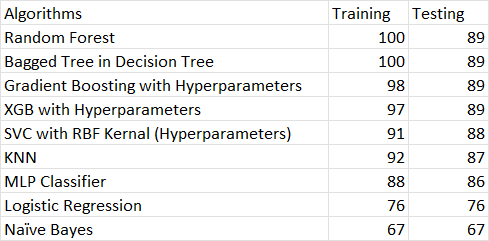

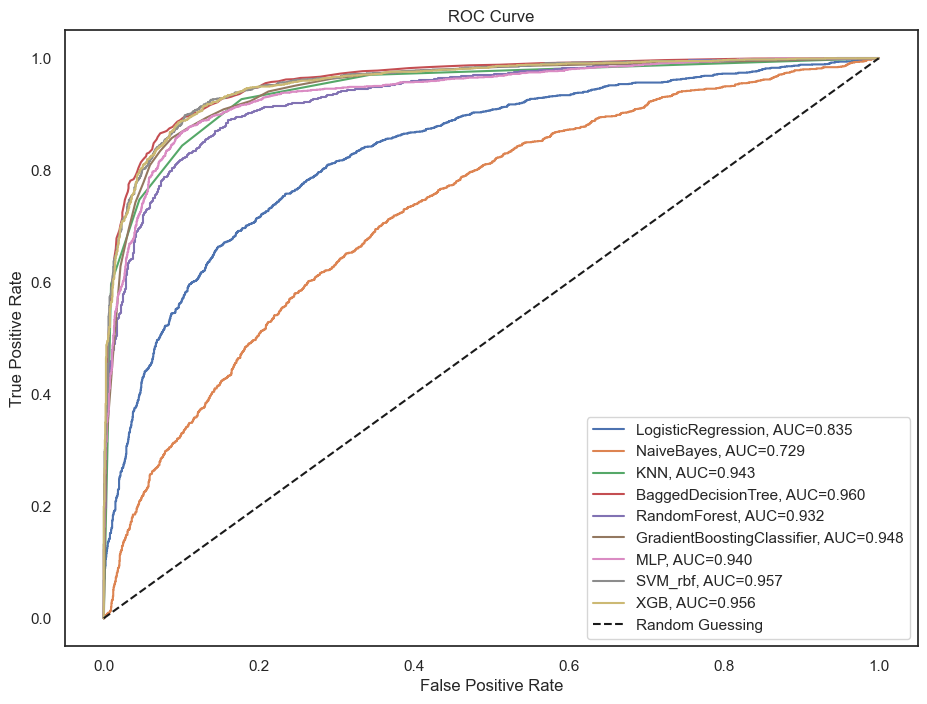

In [158]:
# Plotting ROC Curve

models = ['LogisticRegression', 'NaiveBayes', 'KNN', 'BaggedDecisionTree', 'RandomForest', 'GradientBoostingClassifier', 'MLP','SVM_rbf', 'XGB']


scores_dict1 = dict(zip(models, y_scores_list1))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Plot ROC curves and AUC scores for all models in scores_dict1
plt.figure(figsize=(11, 8))
for model_name, y_scores in scores_dict1.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name}, AUC={auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [159]:
sorted_models = sorted(scores_dict1.items(), key=lambda x: roc_auc_score(y_test, x[1]), reverse=True)

# Select top 3 models
top_models = [model_name for model_name, _ in sorted_models[:3]]

print('Top 3 Models based on AUC score:', top_models)

Top 3 Models based on AUC score: ['BaggedDecisionTree', 'SVM_rbf', 'XGB']


## Top 3 Models based on AUC score: 

- RandomForest 
- GradientBoostingClassifier
- Extreme Gradient Boosting